In [1]:
import pandas as pd
import gzip
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns#importing the seaborn library
from tqdm import tqdm
#from progressbar import ProgressBar
import re
#import isbnlib
#from newspaper import Article
%matplotlib notebook

In [2]:
#dfBooks = pd.read_csv('A:\OneDrive\Documents\Master project cluster\df_books.csv.gz')

In [3]:
dfBooks = pd.read_csv('.\df_books.csv.gz')

In [4]:
dfBooks['authors'] = [i[1:-1] for i in dfBooks['authors']]

dfBooks['authors'] = [i.split(',')[0] for i in dfBooks['authors']]
dfBooks['authors'].astype(str)

dfBooks['authors'] = [i[13:] for i in dfBooks['authors']]

In [5]:
dfBooks['authors'] = [i[2:-1] for i in dfBooks['authors']]
dfBooks['authors'].sample(10)

1268719     2978166
196131      6149745
385968      5778174
2392        7044387
640426      8196368
176407     14067464
457206      7912315
823961       489002
753490      7044868
886601      1288326
Name: authors, dtype: object

In [6]:
dfBooks.rename(columns={'authors':'author_id'}, inplace= True)

dfBooks['author_id'] = pd.to_numeric(dfBooks['author_id'])

In [7]:
dfAuthors = pd.read_csv('.\df_authors.csv.gz')

In [8]:
#dfAuthors = pd.read_csv('A:\OneDrive\Documents\Master project cluster\df_authors.csv.gz')
dfAuthors.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [9]:
df = pd.merge(dfBooks, dfAuthors, on="author_id")
df.head()

,isbn,text_reviews_count_x,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating_x,kindle_asin,...,image_url,book_id,ratings_count_x,work_id,title,title_without_series,average_rating_y,text_reviews_count_y,name,ratings_count_y
0,NaN,7,['189911'],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,False,4.03,NaN,...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",3.92,5075,Barbara Hambly,122118
1,0345381017,65,[],US,eng,"[{'count': '381', 'name': 'to-read'}, {'count'...",NaN,False,3.76,B004TC146E,...,https://s.gr-assets.com/assets/nophoto/book/11...,438134,689,426994,Bride of the Rat God,Bride of the Rat God,3.92,5075,Barbara Hambly,122118
2,0345421906,18,['189928'],US,eng,"[{'count': '376', 'name': 'to-read'}, {'count'...",NaN,False,3.50,B002IPZH8U,...,https://images.gr-assets.com/books/1320471809m...,438132,498,426992,"Knight of the Demon Queen (Winterlands, #3)","Knight of the Demon Queen (Winterlands, #3)",3.92,5075,Barbara Hambly,122118
3,NaN,2,['189927'],US,NaN,"[{'count': '451', 'name': 'to-read'}, {'count'...",B002IPZHA8,True,3.64,B002IPZHA8,...,https://s.gr-assets.com/assets/nophoto/book/11...,11579087,45,170348,"Dragonshadow (Winterlands, Book 2)","Dragonshadow (Winterlands, Book 2)",3.92,5075,Barbara Hambly,122118
4,0727884271,47,['611220'],US,eng,"[{'count': '127', 'name': 'to-read'}, {'count'...",NaN,False,4.10,B00OERTV1Y,...,https://images.gr-assets.com/books/1420790916m...,21538610,183,40872609,"Crimson Angel (Benjamin January, #13)","Crimson Angel (Benjamin January, #13)",3.92,5075,Barbara Hambly,122118


In [10]:
df.rename(columns={'name':'author_name'}, inplace= True)

In [11]:
df.rename(columns={'average_rating_x':'book_average_rating', 'ratings_count_x':'book_ratings_count', 
                   'text_reviews_count_x':'book_text_review_count',
                  'average_rating_y':'author_average_rating', 'ratings_count_y': 'author_ratings_count',
                  'text_reviews_count_y': 'author_text_reviews_count'}, inplace = True)

In [12]:
df['book_average_rating'] = pd.to_numeric(df['book_average_rating'], downcast = 'float')

In [13]:
import numpy as np

In [14]:
df['series']

0          ['189911']
1                  []
2          ['189928']
3          ['189927']
4          ['611220']
              ...    
1308950            []
1308951            []
1308952            []
1308953            []
1308954            []
Name: series, Length: 1308955, dtype: object

In [15]:
df['series'] = [i[2:-2] for i in df['series']]

newvalues = []

for index, value in df['series'].items():
    try: 
        value = pd.to_numeric(value, downcast = 'float')
        newvalues.append(value)
    except:
        value = value.split(',')[0]
        value = value[:-1]
        value = pd.to_numeric(value, downcast = 'float')
        newvalues.append(value)
    

df['series'] = newvalues

In [16]:
df['series']

0          189911.0
1               NaN
2          189928.0
3          189927.0
4          611220.0
             ...   
1308950         NaN
1308951         NaN
1308952         NaN
1308953         NaN
1308954         NaN
Name: series, Length: 1308955, dtype: float32

In [17]:
df['series'].fillna(0)

0          189911.0
1               0.0
2          189928.0
3          189927.0
4          611220.0
             ...   
1308950         0.0
1308951         0.0
1308952         0.0
1308953         0.0
1308954         0.0
Name: series, Length: 1308955, dtype: float32

In [18]:
df['similar_books'] = [i[2:-2] for i in df['similar_books']]

In [19]:
newValues=[]
for index, value in df['similar_books'].items():
    try: 
        value = value.split(',')[0]
        value = value[:-1]
        value = pd.to_numeric(value, downcast= 'float')
        newValues.append(value)
    except:
        print('n')
    
df['similar_books'] = newValues

In [20]:
df['similar_books']

0             19997.0
1            263758.0
2          10719103.0
3          10719103.0
4           7968825.0
              ...    
1308950           NaN
1308951           NaN
1308952           NaN
1308953     7219701.0
1308954           NaN
Name: similar_books, Length: 1308955, dtype: float32

In [21]:
df['similar_books'].fillna(0)

0             19997.0
1            263758.0
2          10719103.0
3          10719103.0
4           7968825.0
              ...    
1308950           0.0
1308951           0.0
1308952           0.0
1308953     7219701.0
1308954           0.0
Name: similar_books, Length: 1308955, dtype: float32

In [22]:
df.to_csv('dataset.csv')

In [22]:
knnDf = df.copy()

In [23]:
correlation_matrix = knnDf.corr()

In [24]:
correlation_matrix['book_average_rating']

book_text_review_count       0.016407
series                       0.131776
is_ebook                     0.071463
book_average_rating          1.000000
similar_books                0.024228
author_id                    0.099583
num_pages                    0.029744
publication_day              0.029107
publication_month            0.026369
publication_year             0.000724
book_id                      0.149317
book_ratings_count           0.015441
work_id                      0.138352
author_average_rating        0.753883
author_text_reviews_count    0.087466
author_ratings_count         0.079648
Name: book_average_rating, dtype: float64

In [26]:
knnDf.columns

Index(['isbn', 'book_text_review_count', 'series', 'country_code',
       'language_code', 'popular_shelves', 'asin', 'is_ebook',
       'book_average_rating', 'kindle_asin', 'similar_books', 'description',
       'format', 'link', 'author_id', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'url', 'image_url', 'book_id', 'book_ratings_count',
       'work_id', 'title', 'title_without_series', 'author_average_rating',
       'author_text_reviews_count', 'author_name', 'author_ratings_count'],
      dtype='object')

In [27]:
#since all country code are US, delete column  
del knnDf['country_code']
#removing language code from the hier dataframe 
del knnDf['language_code']
#removing the popular shelves 
del knnDf['popular_shelves']
#removing asin
del knnDf['asin']
#removing description 
del knnDf['description']
#removing description
del knnDf['format']
#removing link
del knnDf['link']
#removing publisher
del knnDf['publisher']
#removing image link 
del knnDf['image_url']

del knnDf['edition_information']
del knnDf['url']
del knnDf['title']
del knnDf['title_without_series']

del knnDf['author_name']

del knnDf['kindle_asin']
del knnDf['isbn']
del knnDf['isbn13']

In [28]:
knnDf=knnDf.replace('NaN','0')

In [29]:
knnDf.fillna(0)

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating,author_text_reviews_count,author_ratings_count
0,7,189911.0,False,4.03,19997.0,10333.0,600.0,0.0,0.0,1987.0,7327624,140,8948723,3.92,5075,122118
1,65,0.0,False,3.76,263758.0,10333.0,336.0,31.0,10.0,1994.0,438134,689,426994,3.92,5075,122118
2,18,189928.0,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92,5075,122118
3,2,189927.0,True,3.64,10719103.0,10333.0,0.0,0.0,0.0,0.0,11579087,45,170348,3.92,5075,122118
4,47,611220.0,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92,5075,122118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308950,6,0.0,False,4.12,0.0,429185.0,576.0,1.0,2.0,2001.0,823090,51,808888,4.06,7,84
1308951,2,0.0,False,3.57,0.0,411801.0,173.0,0.0,0.0,2002.0,6549923,17,1260023,3.71,7,76
1308952,3,0.0,False,4.46,0.0,172325.0,44.0,1.0,5.0,1998.0,690342,57,676689,4.23,34,328
1308953,22,0.0,False,3.82,7219701.0,164105.0,245.0,30.0,4.0,2003.0,282244,137,273797,3.75,57,305


In [30]:
knnDf = knnDf[np.isfinite(knnDf).all(1)]

In [31]:
knnDf

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating,author_text_reviews_count,author_ratings_count
2,18,189928.0,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92,5075,122118
4,47,611220.0,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92,5075,122118
7,8,432622.0,False,3.26,700095.0,10333.0,330.0,1.0,4.0,1995.0,898954,135,1230005,3.92,5075,122118
9,49,189921.0,False,3.97,555501.0,10333.0,480.0,30.0,4.0,2002.0,176243,694,170275,3.92,5075,122118
12,4,189898.0,True,3.93,611346.0,10333.0,369.0,29.0,3.0,2011.0,13566733,21,170340,3.92,5075,122118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308636,80,185573.0,False,3.90,64006.0,1339253.0,144.0,11.0,11.0,2008.0,3138825,894,3170262,3.96,102,1263
1308670,11,919846.0,False,3.48,12409185.0,4804452.0,212.0,6.0,7.0,2012.0,13705173,81,19337681,3.48,11,98
1308734,16,305204.0,True,3.78,7031013.0,5133405.0,280.0,9.0,10.0,2011.0,12375954,34,17356438,3.94,25,53
1308799,25,909997.0,False,4.06,17385448.0,7772430.0,352.0,15.0,7.0,2013.0,17837451,267,24959880,4.03,25,334


In [32]:
df_new = knnDf[np.isfinite(knnDf).all(1)]

#view updated DataFrame
print(df_new)

         book_text_review_count    series  is_ebook  book_average_rating  \
2                            18  189928.0     False                 3.50   
4                            47  611220.0     False                 4.10   
7                             8  432622.0     False                 3.26   
9                            49  189921.0     False                 3.97   
12                            4  189898.0      True                 3.93   
...                         ...       ...       ...                  ...   
1308636                      80  185573.0     False                 3.90   
1308670                      11  919846.0     False                 3.48   
1308734                      16  305204.0      True                 3.78   
1308799                      25  909997.0     False                 4.06   
1308898                      10  749226.0     False                 3.63   

         similar_books  author_id  num_pages  publication_day  \
2           10719103.0

In [33]:
df_new

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating,author_text_reviews_count,author_ratings_count
2,18,189928.0,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92,5075,122118
4,47,611220.0,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92,5075,122118
7,8,432622.0,False,3.26,700095.0,10333.0,330.0,1.0,4.0,1995.0,898954,135,1230005,3.92,5075,122118
9,49,189921.0,False,3.97,555501.0,10333.0,480.0,30.0,4.0,2002.0,176243,694,170275,3.92,5075,122118
12,4,189898.0,True,3.93,611346.0,10333.0,369.0,29.0,3.0,2011.0,13566733,21,170340,3.92,5075,122118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308636,80,185573.0,False,3.90,64006.0,1339253.0,144.0,11.0,11.0,2008.0,3138825,894,3170262,3.96,102,1263
1308670,11,919846.0,False,3.48,12409185.0,4804452.0,212.0,6.0,7.0,2012.0,13705173,81,19337681,3.48,11,98
1308734,16,305204.0,True,3.78,7031013.0,5133405.0,280.0,9.0,10.0,2011.0,12375954,34,17356438,3.94,25,53
1308799,25,909997.0,False,4.06,17385448.0,7772430.0,352.0,15.0,7.0,2013.0,17837451,267,24959880,4.03,25,334


In [35]:
from sklearn import preprocessing
from sklearn import utils
label= preprocessing.LabelEncoder()
col_transformed = label.fit_transform(df_new.is_ebook)
df_new.is_ebook = col_transformed

In [36]:
df_new.dtypes

book_text_review_count         int64
series                       float32
is_ebook                       int64
book_average_rating          float32
similar_books                float32
author_id                    float64
num_pages                    float64
publication_day              float64
publication_month            float64
publication_year             float64
book_id                        int64
book_ratings_count             int64
work_id                        int64
author_average_rating        float64
author_text_reviews_count      int64
author_ratings_count           int64
dtype: object

In [37]:
df_new['series'] = df_new['series'].astype(int)
df_new['book_average_rating'] = df_new['book_average_rating'].astype(int)
df_new['similar_books'] = df_new['similar_books'].astype(int)
df_new['author_id'] = df_new['author_id'].astype(int)
df_new['num_pages'] = df_new['num_pages'].astype(int)
df_new['publication_day'] = df_new['publication_day'].astype(int)
df_new['publication_month'] = df_new['publication_month'].astype(int)
df_new['publication_year'] = df_new['publication_year'].astype(int)
df_new['author_average_rating'] = df_new['author_average_rating'].astype(int)

In [ ]:
df_new

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#target is book average rating 
# Split the data into features (X) and target (y)
X = df_new.drop('book_average_rating', axis=1)
y = df_new['book_average_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7472578546198179


In [42]:
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 1.3.0


In [43]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=3)
    meanScore = np.mean(score)
    scores.append(meanScore)

In [44]:
scores

[0.659047462454806,
 0.6707133444827241,
 0.6994600130812575,
 0.7055113844548226,
 0.7202774752784578,
 0.723242715117173,
 0.7323896166698803,
 0.7328868909312846,
 0.7387059625825669,
 0.7397842177345239,
 0.7445342896565075,
 0.7448131326510193,
 0.748117738872895,
 0.7480015230714764,
 0.7511527467002872,
 0.7511248406454051,
 0.7537322701356096,
 0.7539088689555146,
 0.7560422230431012,
 0.7557493998673636,
 0.7569857242001193,
 0.7570554284843319,
 0.7579106362907745,
 0.7581244219922382,
 0.7592445539186027,
 0.7593886242539988,
 0.7601043925794736,
 0.7601926917626045,
 0.7608619832421738,
 0.7610943639073618]

In [45]:
scores[0]

0.659047462454806

Text(0, 0.5, 'Accuracy Score')

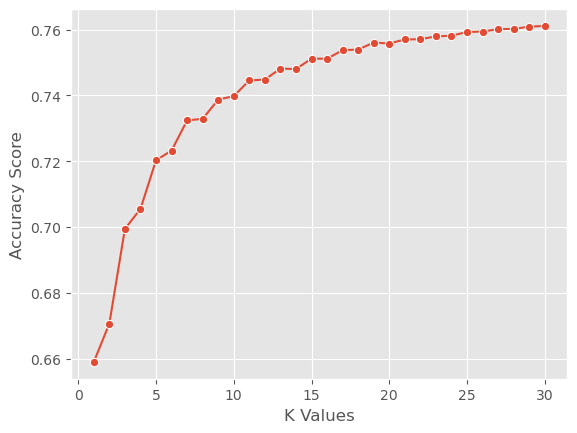

In [46]:

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [47]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=30)

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7798614984197806
Precision: 0.38933946179880474
Recall: 0.3884876469008426


C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:

print(classification_report(y_test, y_pred))
      
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        97
           3       0.79      0.82      0.80     23654
           4       0.77      0.73      0.75     19280

    accuracy                           0.78     43032
   macro avg       0.39      0.39      0.39     43032
weighted avg       0.78      0.78      0.78     43032

[[    0     1     0     0]
 [    0     0    94     3]
 [    0     0 19462  4192]
 [    0     0  5183 14097]]


C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.46489683773975027

In [56]:
train_preds

array([4, 4, 3, ..., 3, 3, 3])

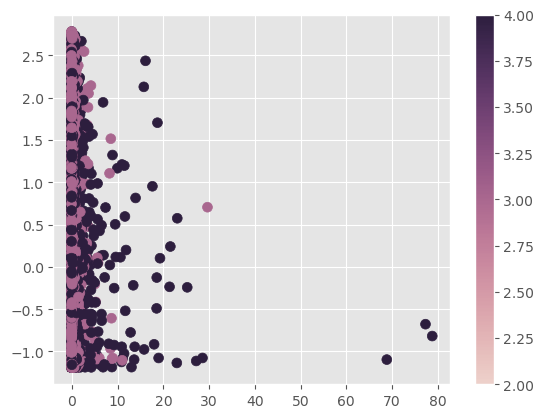

In [52]:
#predictions shown 
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

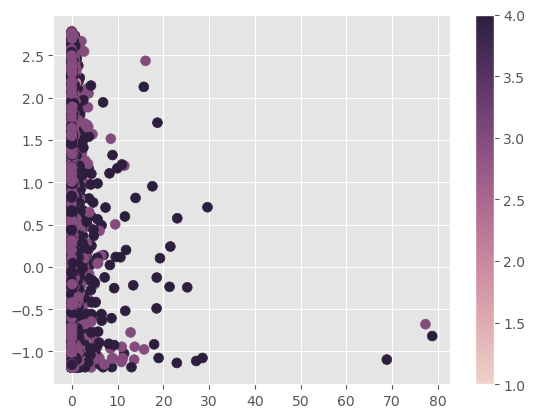

In [53]:
#actually shown 
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [ ]:
df= pd.read_csv('.\')

<IPython.core.display.Javascript object>


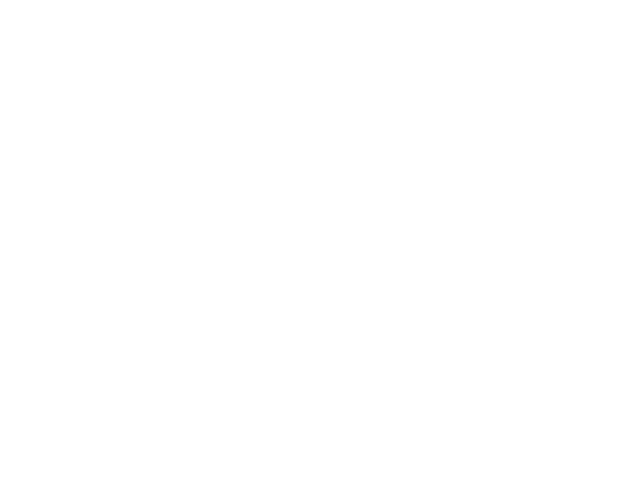

NameError: name 'df_scaled' is not defined

In [55]:
#tempo, instrumentalness, cluster_Id

#Naturally, the above method can be applied to 3D scatter plot

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = df_scaled.groupby(by='Cluster_Id')

axis.set_xlabel('Tempo')
axis.set_ylabel('energy')
axis.set_zlabel('instrumentalness')

shapes_dict = dict(zip(groups.indices.keys(),['^','s','p','8','*']))

for name, group in groups:
    axis.scatter(group.Tempo, group.energy, group.instrumentalness,marker=shapes_dict[name], label=name)

axis.legend()
plt.show()